In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
matplotlib.rcParams.update({'font.size': 14})

In [2]:
def pos_multi(observers, observer_num, num_organs=4):
    pos_list = []
    for ordx in range(num_organs):
        pos_list.append(((observer_num + 1) / (observers + 1)) + ordx)
    return pos_list

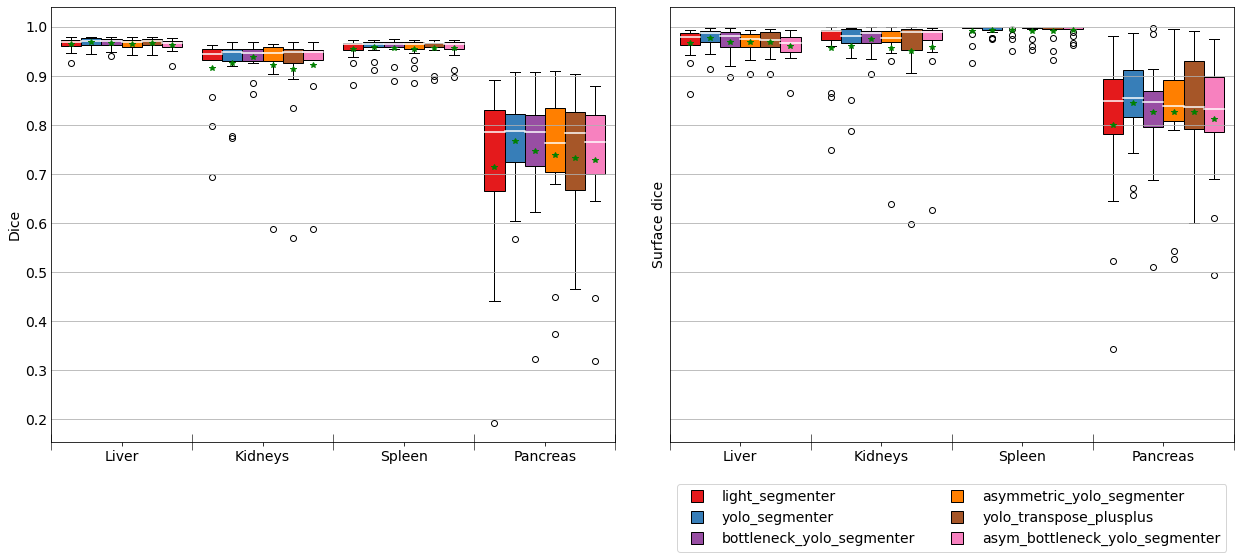

In [3]:
#models = ["light_segmenter", "yolo_segmenter", "bottleneck_yolo_segmenter", "asymmetric_yolo_segmenter", "asym_bottleneck_yolo_segmenter", "bridged_yolo_segmenter","yolo_transpose" , "yolo_transpose_plusplus","yolo_transpose_plusplus_explogloss", "ytp_learnableWL","superres_segmenter", "fullRes_segmenter",]
models = ["light_segmenter","yolo_segmenter", "bottleneck_yolo_segmenter", "asymmetric_yolo_segmenter", "yolo_transpose_plusplus", "asym_bottleneck_yolo_segmenter"]
all_res = np.full((len(models), 16, 4, 2), np.nan)

for mdx, model in enumerate(models):
    all_res[mdx] = np.load(os.path.join("/data/FLARE21/results/", model, "full_res_results_grid.npy"))[0]
fig, (ax0,ax1) = plt.subplots(ncols=2, sharey=True, figsize=(18,8))

num_models = len(models)
organs = ("Liver", "Kidneys", "Spleen", "Pancreas")
#colors = ['xkcd:bright teal', 'xkcd:vibrant green', 'xkcd:fire engine red', 'xkcd:bright yellow', 'xkcd:electric pink', 'xkcd:pumpkin']
cmap = matplotlib.cm.get_cmap('Set1')#'terrain')
colors = [cmap(i/num_models) for i in range(num_models)]

metric_idx = 0
# plot data
bps = []
for mdx in range(num_models):
    locals()[f'bp{mdx}'] = ax0.boxplot([all_res[mdx,:,organ_idx,metric_idx] for organ_idx in range(4)], positions=pos_multi(num_models, mdx), widths=1/(num_models+1), patch_artist=True, zorder=0)
    bps.append(locals()[f'bp{mdx}'])
    ax0.plot(pos_multi(num_models, mdx), [np.nanmean(all_res[mdx, :, organ_idx, metric_idx]) for organ_idx in range(4)], "g*")

# fill colors & median colors
for color_idx, bp in enumerate(bps):
    for patch, line in zip(bp['boxes'], bp['medians']):
        patch.set_facecolor(colors[color_idx]) 
        line.set_color('xkcd:white')
        line.set_linewidth(1.5)

# ticks and labels
ax0.set_xticks([0.5,1.5,2.5,3.5])
ax0.set_xticklabels(organs)
ax0.set_xticks(np.linspace(0,4,5), minor=True)
ax0.tick_params(which='minor', direction='inout', length=16, axis='x')
ax0.tick_params(which='both', direction='inout', length=0, axis='y')
# make some of the ticks invisible
for t in ax0.xaxis.get_ticklines():
    t.set_color((0,0,0,0))
ax0.set_ylabel('Dice')
ax0.set_xlim(0,4)
ax0.grid(which='both', axis='y')

metric_idx = 1
# plot data
bps = []
for mdx in range(num_models):
    locals()[f'bp{mdx}'] = ax1.boxplot([all_res[mdx,:,organ_idx,metric_idx] for organ_idx in range(4)], positions=pos_multi(num_models, mdx), widths=1/(num_models+1), patch_artist=True, zorder=0)
    bps.append(locals()[f'bp{mdx}'])
    ax1.plot(pos_multi(num_models, mdx), [np.nanmean(all_res[mdx, :, organ_idx, metric_idx]) for organ_idx in range(4)], "g*")

# fill colors & median colors
for color_idx, bp in enumerate(bps):
    for patch, line in zip(bp['boxes'], bp['medians']):
        patch.set_facecolor(colors[color_idx]) 
        line.set_color('xkcd:white')
        line.set_linewidth(1.5)

# ticks and labels
ax1.set_xticks([0.5,1.5,2.5,3.5])
ax1.set_xticklabels(organs)
ax1.set_xticks(np.linspace(0,4,5), minor=True)
ax1.tick_params(which='minor', direction='inout', length=16, axis='x')
ax1.tick_params(which='both', direction='inout', length=0, axis='y')
# make some of the ticks invisible
for t in ax1.xaxis.get_ticklines():
    t.set_color((0,0,0,0))
ax1.set_ylabel('Surface dice')
ax1.set_xlim(0,4)
ax1.grid(which='both', axis='y')

m_s = []
for color, label in zip(colors, models):
    m_s.append(mlines.Line2D([],[], mfc=color, mec='k', marker='s', linestyle='None', mew=1, markersize=12.5, label=label))
ax1.legend(handles=m_s, bbox_to_anchor=(0,-1,1,0.92), bbox_transform=ax1.transAxes, loc='upper center', ncol=2)
plt.subplots_adjust(left=0.101, right=0.901, top=0.981, bottom=0.204, wspace=0.2, hspace=0.122)
plt.tight_layout()
plt.show()

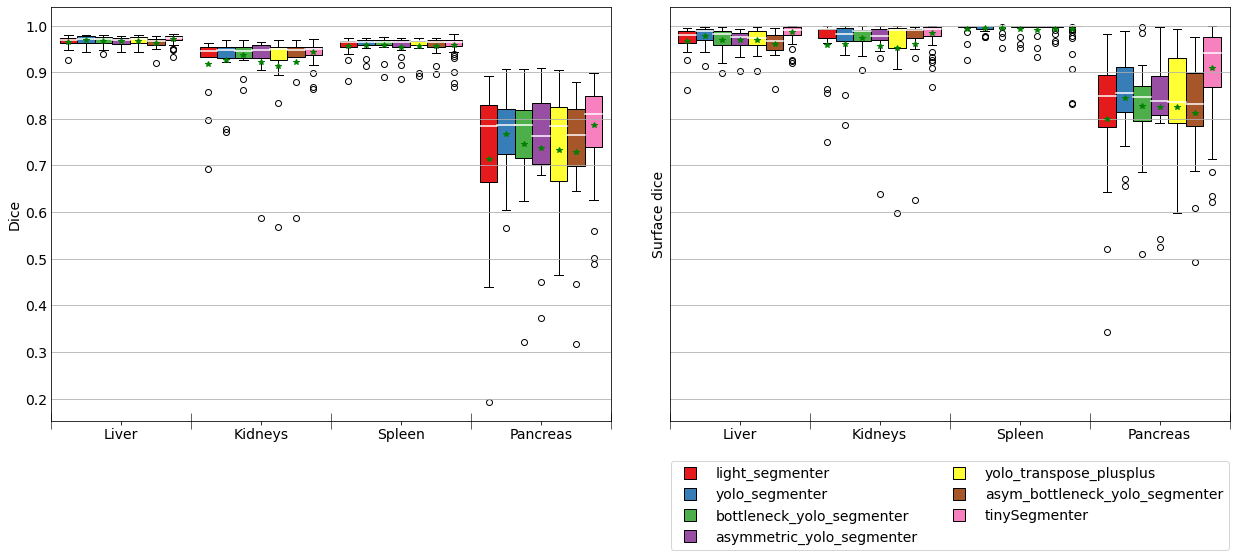

In [4]:
models = ["light_segmenter","yolo_segmenter", "bottleneck_yolo_segmenter", "asymmetric_yolo_segmenter", "yolo_transpose_plusplus", "asym_bottleneck_yolo_segmenter"]
all_res = np.full((len(models), 16, 4, 2), np.nan)

for mdx, model in enumerate(models):
    all_res[mdx] = np.load(os.path.join("/data/FLARE21/results/", model, "full_res_results_grid.npy"))[0]
add_res = np.load(os.path.join("/data/FLARE21/results/", "full_runs/tiny_segmenter_192", "full_res_results_grid.npy"))[0] # "full_runs/yolo_transpose_plusplus"
fig, (ax0,ax1) = plt.subplots(ncols=2, sharey=True, figsize=(18,8))

num_models = len(models)
organs = ("Liver", "Kidneys", "Spleen", "Pancreas")
cmap = matplotlib.cm.get_cmap('Set1')#'terrain')
colors = [cmap(i/(num_models+1)) for i in range(num_models+1)]

metric_idx = 0
# plot data
bps = []
for mdx in range(num_models):
    bps.append(ax0.boxplot([all_res[mdx,:,organ_idx,metric_idx] for organ_idx in range(4)], positions=pos_multi(num_models+1, mdx), widths=1/(num_models+2), patch_artist=True, zorder=0))
    ax0.plot(pos_multi(num_models+1, mdx), [np.nanmean(all_res[mdx, :, organ_idx, metric_idx]) for organ_idx in range(4)], "g*")
bps.append(ax0.boxplot([np.delete(add_res[:,organ_idx,metric_idx], np.argwhere(~(add_res[:,organ_idx,metric_idx]>0))) for organ_idx in range(4)], positions=pos_multi(num_models+1, mdx+1), widths=1/(num_models+2), patch_artist=True, zorder=0))
ax0.plot(pos_multi(num_models+1, mdx+1), [np.nanmean(add_res[:, organ_idx, metric_idx]) for organ_idx in range(4)], "g*")

# fill colors & median colors
for color_idx, bp in enumerate(bps):
    for patch, line in zip(bp['boxes'], bp['medians']):
        patch.set_facecolor(colors[color_idx]) 
        line.set_color('xkcd:white')
        line.set_linewidth(1.5)

# ticks and labels
ax0.set_xticks([0.5,1.5,2.5,3.5])
ax0.set_xticklabels(organs)
ax0.set_xticks(np.linspace(0,4,5), minor=True)
ax0.tick_params(which='minor', direction='inout', length=16, axis='x')
ax0.tick_params(which='both', direction='inout', length=0, axis='y')
# make some of the ticks invisible
for t in ax0.xaxis.get_ticklines():
    t.set_color((0,0,0,0))
ax0.set_ylabel('Dice')
ax0.set_xlim(0,4)
ax0.grid(which='both', axis='y')

metric_idx = 1
# plot data
bps = []
for mdx in range(num_models):
    bps.append(ax1.boxplot([all_res[mdx,:,organ_idx,metric_idx] for organ_idx in range(4)], positions=pos_multi(num_models+1, mdx), widths=1/(num_models+2), patch_artist=True, zorder=0))
    ax1.plot(pos_multi(num_models+1, mdx), [np.nanmean(all_res[mdx, :, organ_idx, metric_idx]) for organ_idx in range(4)], "g*")
bps.append(ax1.boxplot([np.delete(add_res[:,organ_idx,metric_idx], np.argwhere(~(add_res[:,organ_idx,metric_idx]>0))) for organ_idx in range(4)], positions=pos_multi(num_models+1, mdx+1), widths=1/(num_models+2), patch_artist=True, zorder=0))
ax1.plot(pos_multi(num_models+1, mdx+1), [np.nanmean(add_res[:, organ_idx, metric_idx]) for organ_idx in range(4)], "g*")

# fill colors & median colors
for color_idx, bp in enumerate(bps):
    for patch, line in zip(bp['boxes'], bp['medians']):
        patch.set_facecolor(colors[color_idx]) 
        line.set_color('xkcd:white')
        line.set_linewidth(1.5)

# ticks and labels
ax1.set_xticks([0.5,1.5,2.5,3.5])
ax1.set_xticklabels(organs)
ax1.set_xticks(np.linspace(0,4,5), minor=True)
ax1.tick_params(which='minor', direction='inout', length=16, axis='x')
ax1.tick_params(which='both', direction='inout', length=0, axis='y')
# make some of the ticks invisible
for t in ax1.xaxis.get_ticklines():
    t.set_color((0,0,0,0))
ax1.set_ylabel('Surface dice')
ax1.set_xlim(0,4)
ax1.grid(which='both', axis='y')

m_s = []
for color, label in zip(colors, models + ["tinySegmenter"]):
    m_s.append(mlines.Line2D([],[], mfc=color, mec='k', marker='s', linestyle='None', mew=1, markersize=12.5, label=label))
ax1.legend(handles=m_s, bbox_to_anchor=(0,-1,1,0.92), bbox_transform=ax1.transAxes, loc='upper center', ncol=2)
plt.subplots_adjust(left=0.101, right=0.901, top=0.981, bottom=0.204, wspace=0.2, hspace=0.122)
plt.tight_layout()
plt.show()

(3, 361, 4, 2)


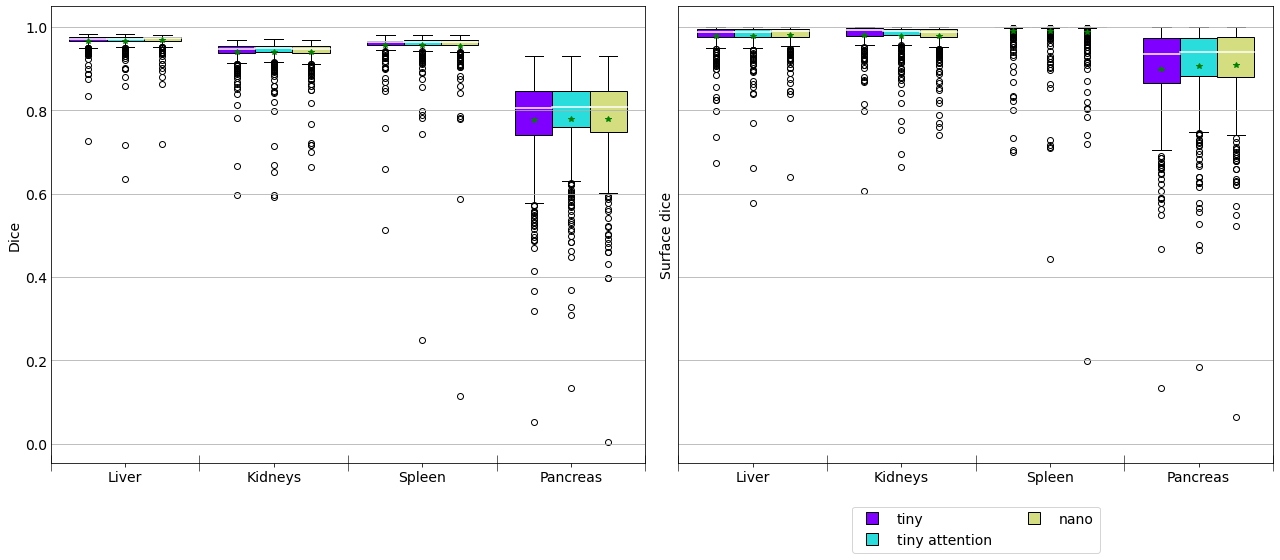

In [5]:
#models = ["yolo_transpose_plusplus", "tiny_segmenter_192", "tiny_segmenter_192_donalOutputs", "nano_segmenter_192", "nano_segmenter_192_donalOutputs"]
models = ["tiny_segmenter_192", "tiny_attention_segmenter_192", "nano_segmenter_192"]
all_res = np.full((len(models), 361, 4, 2), np.nan)

for mdx, model in enumerate(models):
    #all_res[mdx] = np.load(os.path.join("/data/FLARE21/results/full_runs/", model, "full_res_results_grid.npy"))[0]
    all_res[mdx] = np.load(os.path.join("/data/FLARE21/results/full_runs/", model, "full_res_results_grid.npy")).reshape((5*73, 4, 2))[:-4]
print(all_res.shape)
fig, (ax0,ax1) = plt.subplots(ncols=2, sharey=True, figsize=(18,8))

num_models = len(models)
organs = ("Liver", "Kidneys", "Spleen", "Pancreas")
cmap = matplotlib.cm.get_cmap('rainbow')
colors = [cmap(i/(num_models)) for i in range(num_models)]

metric_idx = 0
# plot data
bps = []
for mdx in range(num_models):
    bps.append(ax0.boxplot([np.delete(all_res[mdx,:,organ_idx,metric_idx], np.argwhere(~(all_res[mdx,:,organ_idx,metric_idx]>0))) for organ_idx in range(4)], positions=pos_multi(num_models, mdx), widths=1/(num_models+1), patch_artist=True, zorder=0))
    ax0.plot(pos_multi(num_models, mdx), [np.nanmean(all_res[mdx, :, organ_idx, metric_idx]) for organ_idx in range(4)], "g*")


# fill colors & median colors
for color_idx, bp in enumerate(bps):
    for patch, line in zip(bp['boxes'], bp['medians']):
        patch.set_facecolor(colors[color_idx]) 
        line.set_color('xkcd:white')
        line.set_linewidth(1.5)

# ticks and labels
ax0.set_xticks([0.5,1.5,2.5,3.5])
ax0.set_xticklabels(organs)
ax0.set_xticks(np.linspace(0,4,5), minor=True)
ax0.tick_params(which='minor', direction='inout', length=16, axis='x')
ax0.tick_params(which='both', direction='inout', length=0, axis='y')
# make some of the ticks invisible
for t in ax0.xaxis.get_ticklines():
    t.set_color((0,0,0,0))
ax0.set_ylabel('Dice')
ax0.set_xlim(0,4)
ax0.grid(which='both', axis='y')

metric_idx = 1
# plot data
bps = []
for mdx in range(num_models):
    bps.append(ax1.boxplot([np.delete(all_res[mdx,:,organ_idx,metric_idx], np.argwhere(~(all_res[mdx,:,organ_idx,metric_idx]>0))) for organ_idx in range(4)], positions=pos_multi(num_models, mdx), widths=1/(num_models+1), patch_artist=True, zorder=0))
    ax1.plot(pos_multi(num_models, mdx), [np.nanmean(all_res[mdx, :, organ_idx, metric_idx]) for organ_idx in range(4)], "g*")

# fill colors & median colors
for color_idx, bp in enumerate(bps):
    for patch, line in zip(bp['boxes'], bp['medians']):
        patch.set_facecolor(colors[color_idx]) 
        line.set_color('xkcd:white')
        line.set_linewidth(1.5)

# ticks and labels
ax1.set_xticks([0.5,1.5,2.5,3.5])
ax1.set_xticklabels(organs)
ax1.set_xticks(np.linspace(0,4,5), minor=True)
ax1.tick_params(which='minor', direction='inout', length=16, axis='x')
ax1.tick_params(which='both', direction='inout', length=0, axis='y')
# make some of the ticks invisible
for t in ax1.xaxis.get_ticklines():
    t.set_color((0,0,0,0))
ax1.set_ylabel('Surface dice')
ax1.set_xlim(0,4)
ax1.grid(which='both', axis='y')

m_s = []
#["ytp_pp", "pytorch tiny", "onnx tiny", "pytorch nano", "onnx nano"]
for color, label in zip(colors, ["tiny", "tiny attention", "nano"]): #
    m_s.append(mlines.Line2D([],[], mfc=color, mec='k', marker='s', linestyle='None', mew=1, markersize=12.5, label=label))
ax1.legend(handles=m_s, bbox_to_anchor=(0,-1,1,0.92), bbox_transform=ax1.transAxes, loc='upper center', ncol=2)
plt.subplots_adjust(left=0.101, right=0.901, top=0.981, bottom=0.204, wspace=0.2, hspace=0.122)
plt.tight_layout()
plt.show()

In [6]:
from roughSeg.utils import getFiles, k_fold_split_train_val_test

# get test fnames
test_im_fnames = []
all_fnames = sorted(getFiles("/data/FLARE21/training_data_192_sameKidneys/scaled_ims/"))
for fold_num in [1,2,3,4,5]:
    _, _, test_inds = k_fold_split_train_val_test(len(all_fnames), fold_num=fold_num, seed=230597)
    test_im_fnames.extend([all_fnames[ind] for ind in test_inds])
test_im_fnames = test_im_fnames[:-4]
# load results
res = np.load(os.path.join("/data/FLARE21/results/full_runs/", "nano_segmenter_192", "full_res_results_grid.npy")).reshape((5*73, 4, 2))[:-4]
# find worst cases
print(f"Worst liver case: {test_im_fnames[np.where(res[:,0,0] < 0.8)[0][0]]}")
print(f"Worst kidneys case: {test_im_fnames[np.where(res[:,1,0] < 0.7)[0][0]]}")
print(f"Worst spleen case: {test_im_fnames[np.where(res[:,2,0] < 0.2)[0][0]]}")
print(f"Worst pancreas case: {test_im_fnames[np.where(res[:,3,0] < 0.2)[0][0]]}")
# find best cases
print(f"Best liver case: {test_im_fnames[np.where(res[:,0,0] > 0.9819)[0][0]]}")
print(f"Best kidneys case: {test_im_fnames[np.where(res[:,1,0] > 0.97)[0][0]]}")
print(f"Best spleen case: {test_im_fnames[np.where(res[:,2,0] > 0.9805)[0][0]]}")
print(f"Best pancreas case: {test_im_fnames[np.where(res[:,3,0] > 0.91)[0][0]]}")


Worst liver case: train_270.npy
Worst kidneys case: train_101.npy
Worst spleen case: train_270.npy
Worst pancreas case: train_078.npy
Best liver case: train_194.npy
Best kidneys case: train_152.npy
Best spleen case: train_199.npy
Best pancreas case: train_241.npy


In [7]:
import SimpleITK as sitk
from roughSeg.utils import windowLevelNormalize
patient = "train_270.npy"
input_dir = "/data/FLARE21/training_data/TrainingImg/"
mask_dir = "/data/FLARE21/training_data/TrainingMask/"
pred_dir = "/data/FLARE21/results/full_runs/nano_segmenter_192/full_res_test_segs/"

# load ct image, segmentations gold standard and prediction
pred = np.load(os.path.join(pred_dir, "pred_" + patient)).astype(float)
sitk_image = sitk.ReadImage(os.path.join(input_dir, patient.replace('.npy','_0000.nii.gz')))
ct_im = sitk.GetArrayFromImage(sitk_image)
sitk_mask = sitk.ReadImage(os.path.join(mask_dir, patient.replace('.npy','.nii.gz')))
gold_mask = sitk.GetArrayFromImage(sitk_mask).astype(float)
# reorient if required
if sitk_mask.GetDirection()[-1] == -1:
    gold_mask = np.flip(gold_mask, axis=0).copy()
    ct_im = np.flip(ct_im, axis=0).copy()
    gold_mask = np.flip(gold_mask, axis=2).copy() 
    ct_im = np.flip(ct_im, axis=2).copy()
# window and level normalisation for the ct
ct_im = windowLevelNormalize(ct_im, level=50, window=400)
# nan-ise the background for layered plotting
gold_mask[gold_mask<0.05] = np.nan
pred[pred<0.05] = np.nan

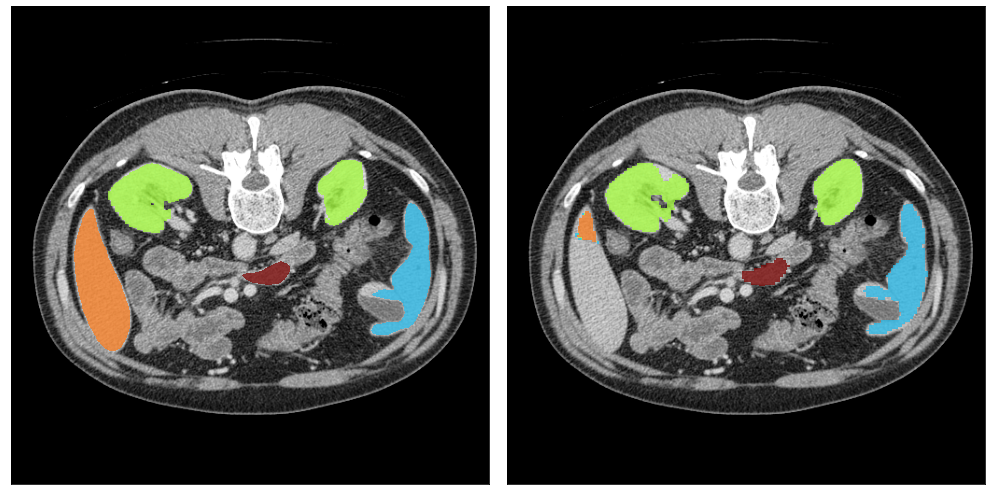

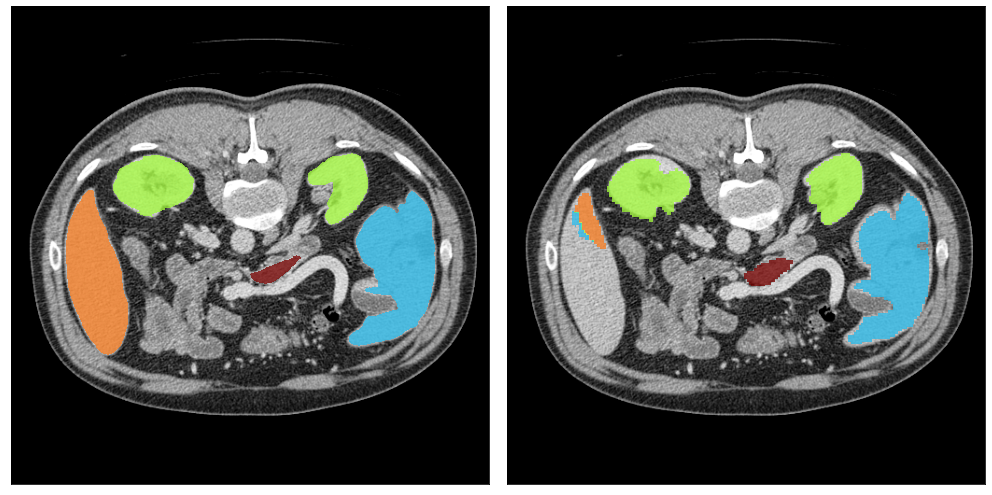

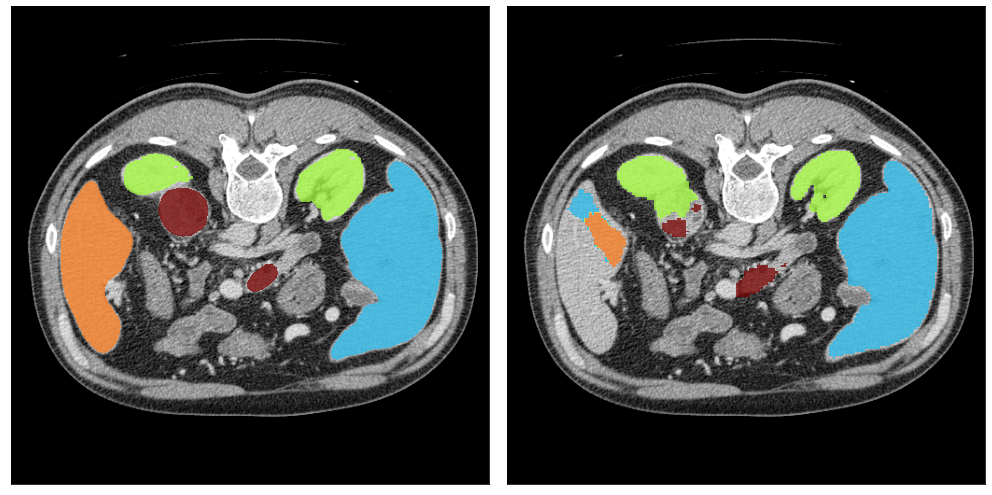

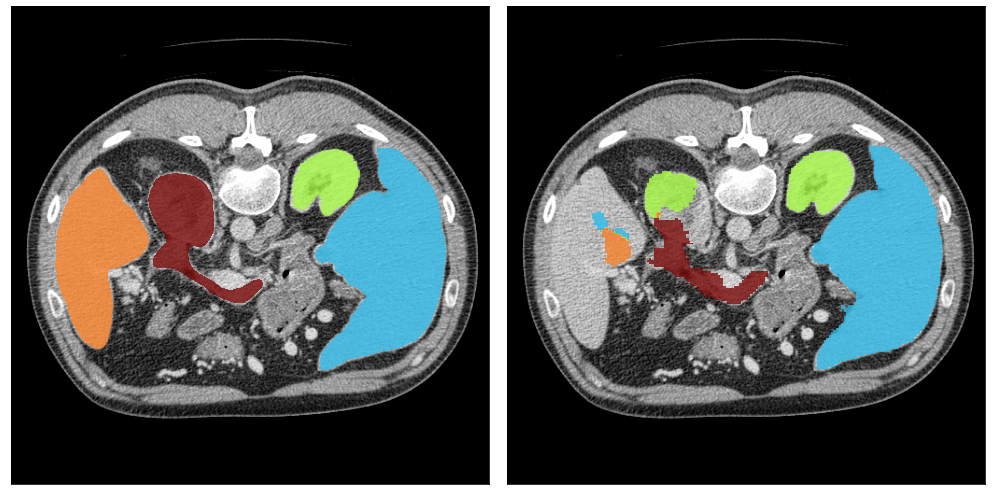

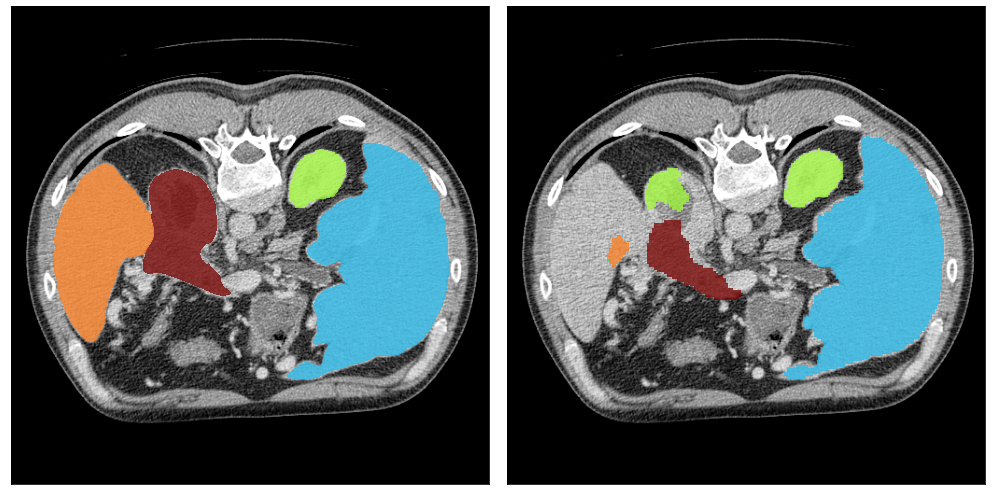

In [8]:
# plotting
for slice_idx in range(480,580,20):
    cmap = "turbo"
    fig, (ax0,ax1) = plt.subplots(ncols=2, figsize=(14,8))
    ax0.imshow(ct_im[slice_idx], vmin=np.min(ct_im), vmax=np.max(ct_im), cmap="Greys_r")
    ax0.imshow(gold_mask[slice_idx], vmin=0, vmax=4, cmap=cmap, alpha=0.75)
    ax1.imshow(ct_im[slice_idx], vmin=np.min(ct_im), vmax=np.max(ct_im), cmap="Greys_r")
    ax1.imshow(pred[slice_idx], vmin=0, vmax=4, cmap=cmap, alpha=0.75)
    ax0.set_xticks([])
    ax0.set_yticks([])
    ax1.set_xticks([])
    ax1.set_yticks([])
    plt.tight_layout()
    plt.show()